In [5]:
install.packages("pwr", depend = TRUE)
library(pwr)
rm(list=ls())
plotMe<-function(x_values,x_label,y_values,y_label,series,plot_title,legend_title,legend_pos="topleft",gridstep_x=.01,gridstep_y=100)
{
   # set up graph
  xrange <- range(x_values)
  yrange <- round(range(y_values))
  colors <- rainbow(length(series))
  plot(xrange, yrange, type="n",
    xlab=x_label,
    ylab=y_label )

  for (i in 1:length(series)){
    lines(x_values, y_values[,i], type="l", lwd=2, col=colors[i])
  }
  # add annotation (grid lines, title, legend) 
  abline(v=0, h=seq(0,yrange[2],gridstep_y), lty=2, col="grey89")
  abline(h=0, v=seq(xrange[1],xrange[2],gridstep_x), lty=2,
     col="grey89")
  title(plot_title)
  legend(legend_pos, title=legend_title, as.character(series),fill=colors)

}

generateData<-function(prop,reduction,alpha,effect)
{
    #calculate the effect (h)

    effect = 2*asin(sqrt(prop*(1-reduction))) - 2*asin(sqrt(prop))

    nalpha<-length(alpha)

    neffect <- length(effect)

    sample_sizes <- array(numeric(nalpha*neffect), dim=c(nalpha,neffect))

    for (i in 1:neffect){

     for (j in 1:nalpha){

      result <- pwr.p.test(h = effect[i], n = NULL,sig.level = 1-alpha[j], power = power,alternative = "two.sided")

      sample_sizes[j,i] <- ceiling(result$n)
      }
    }
    return(sample_sizes)
}



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


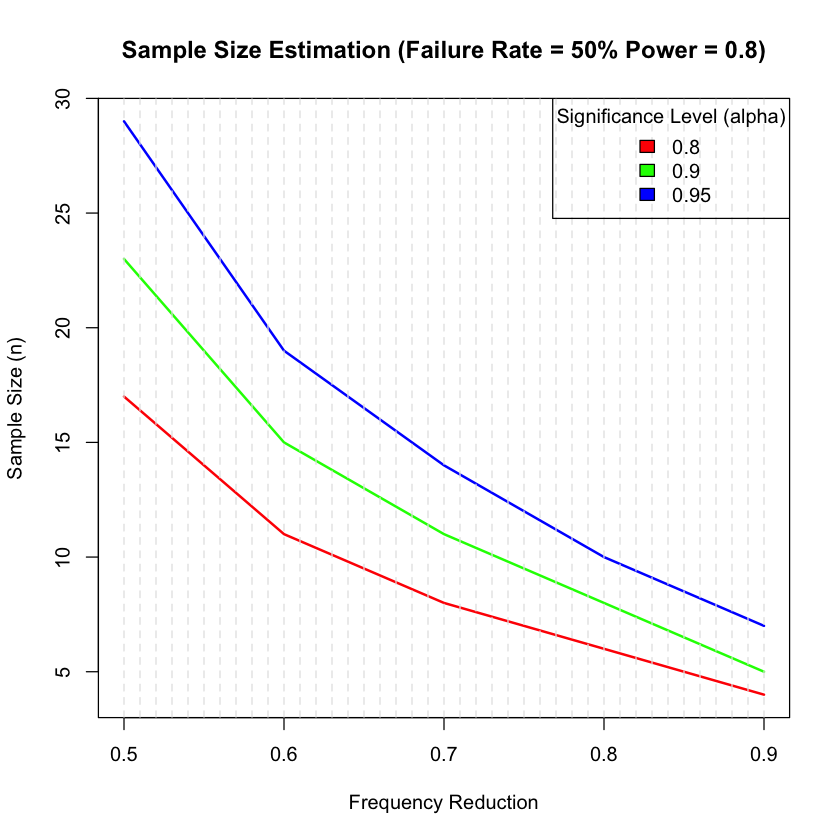

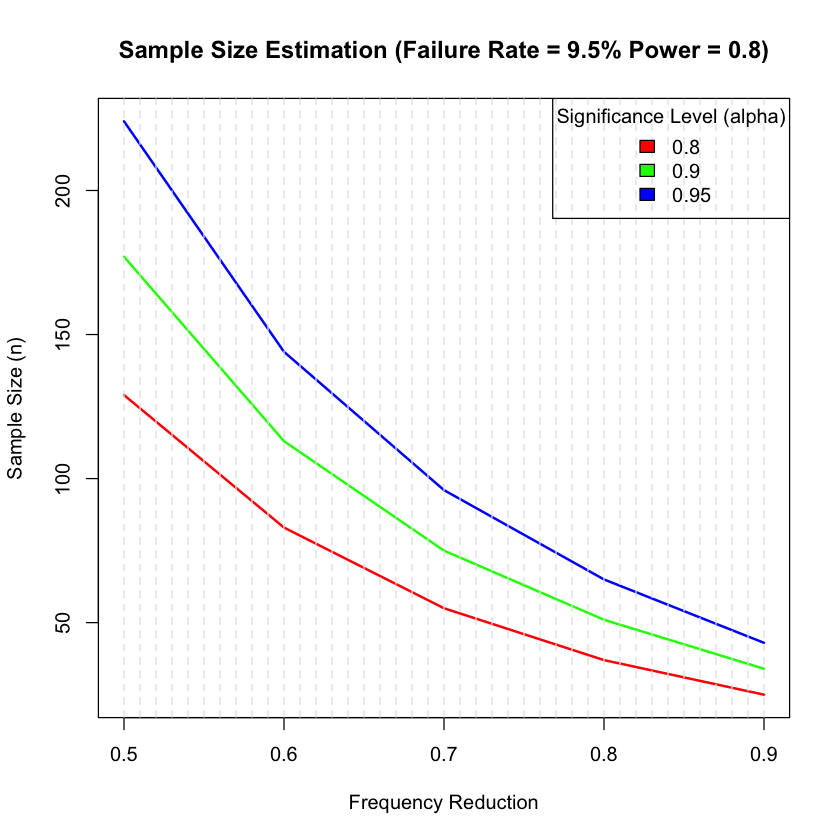

In [10]:
## 4B assuming a mean proportion of failures at ~9.5%

prop<-0.5

#keep power constant

power<-.8

# define 3 significance levels

alpha <- c(.8,.9,.95)

# sweep on effect

reduction <- seq(.5,.9,.1)


sample_sizes<-generateData(prop,reduction,alpha,effect)



plot_title<-"Sample Size Estimation (Failure Rate = 50% Power = 0.8)"

legend_title<-"Significance Level (alpha)"

legend_pos<-"topright"

m<-plotMe(reduction,"Frequency Reduction",t(sample_sizes),"Sample Size (n)",alpha,plot_title,legend_title,legend_pos,gridstep_y = 500)





## 4C assuming a mean proportion of failures at ~9.5%

prop<-0.095

#keep power constant

power<-.8

# define 3 significance levels

alpha <- c(.8,.9,.95)

# sweep on effect

reduction <- seq(.5,.9,.1)


sample_sizes<-generateData(prop,reduction,alpha,effect)



plot_title<-"Sample Size Estimation (Failure Rate = 9.5% Power = 0.8)"

legend_title<-"Significance Level (alpha)"

legend_pos<-"topright"

m<-plotMe(reduction,"Frequency Reduction",t(sample_sizes),"Sample Size (n)",alpha,plot_title,legend_title,legend_pos,gridstep_y = 500)



# null hypothesis: that the failure rate is so high due to chance 
# When the probability of saying that the results are due to anomalies is at 5%, then you need about 50 runs.
# For a margin of error of 10% and 95% confidence that the results are not due to anomolies you need a minimum of 25 runs